In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
ecg = pd.read_csv(r'/content/sam_ECG.csv/MyDrive/Copy of sam_ECG.csv')
# reads the csv file

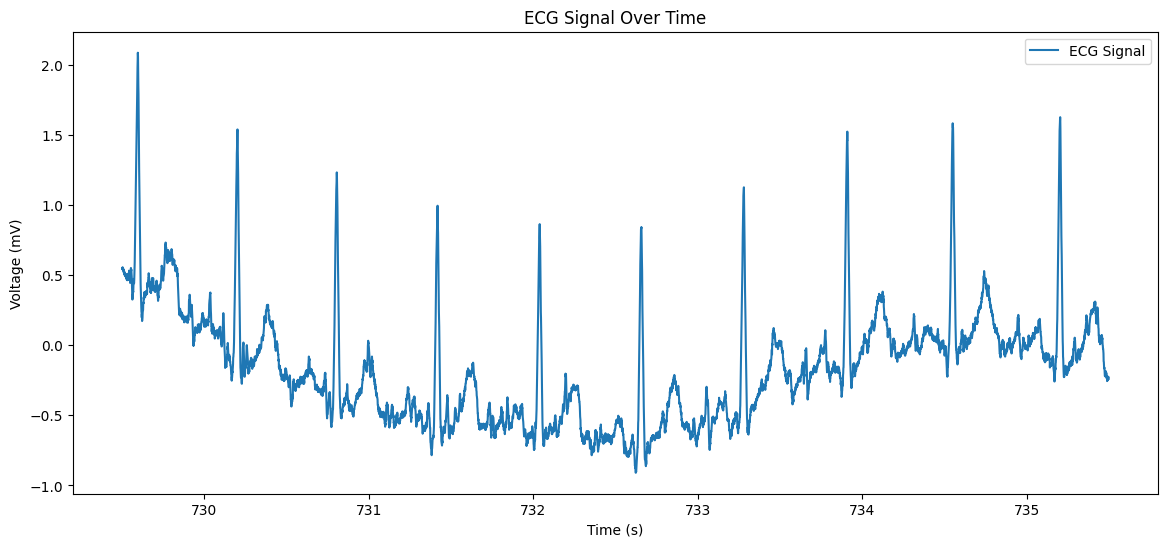

In [9]:
x = ecg['time']
y = ecg['ecg']
dt = x[1] - x[0]
plt.figure(figsize=(14,6))
plt.plot(x[:6000],y[:6000],label='ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.title('ECG Signal Over Time')
plt.legend()
plt.show()

In [10]:
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

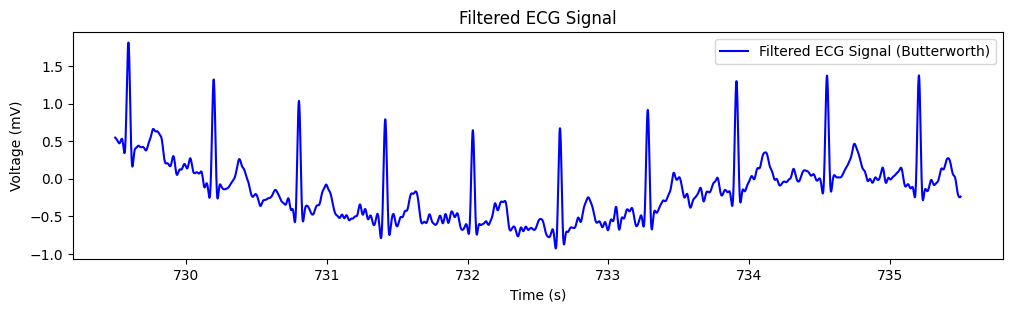

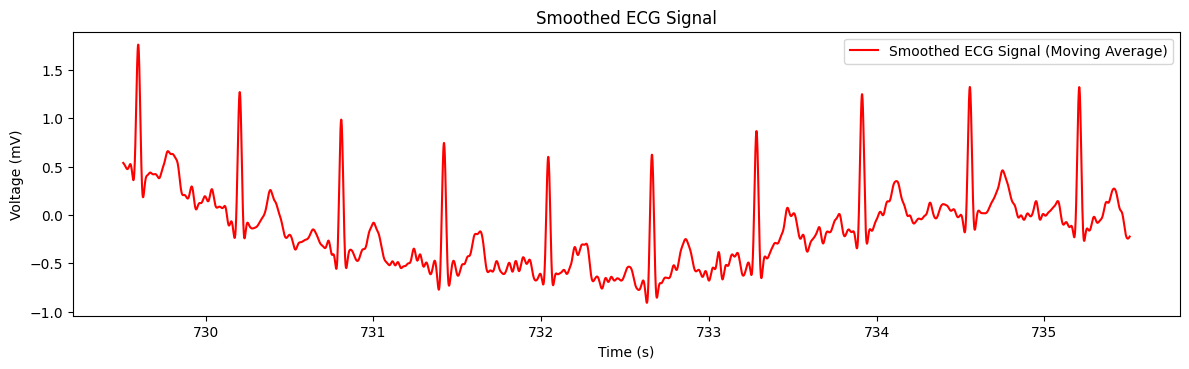

In [14]:
cutoff = 30.0
fs = 1000.0
order = 5

y_filtered = butter_lowpass_filter(y, cutoff, fs, order)

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

window_size = 10
y_smoothed = moving_average(y_filtered, window_size)
x_smoothed = x[window_size-1:]

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 2)
plt.plot(x[:6000], y_filtered[:6000], label='Filtered ECG Signal (Butterworth)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.title('Filtered ECG Signal')
plt.legend()

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 3)
plt.plot(x_smoothed[:6000], y_smoothed[:6000], label='Smoothed ECG Signal (Moving Average)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.title('Smoothed ECG Signal')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/sam_ECG.csv')

Mounted at /content/sam_ECG.csv


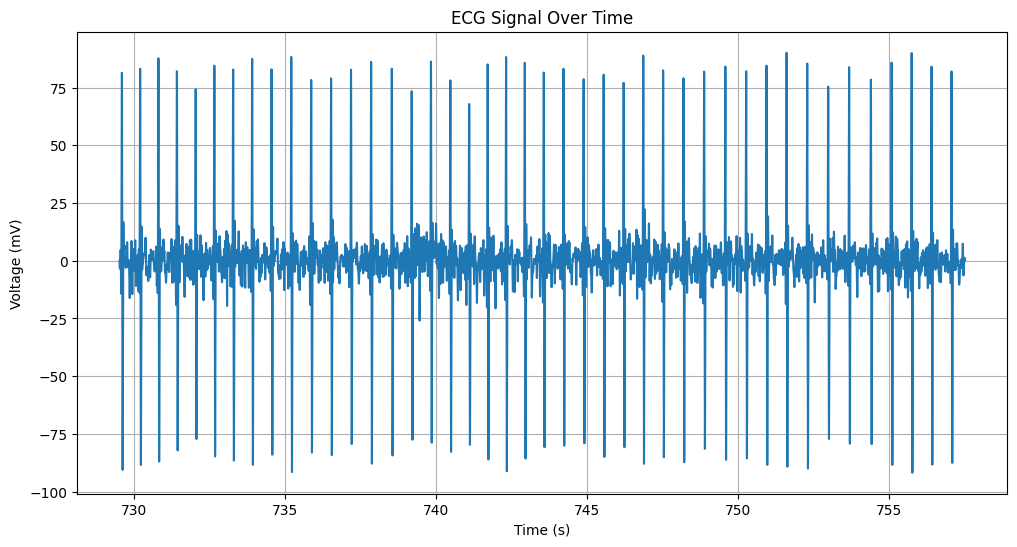

In [15]:
import matplotlib.pyplot as plt
import numpy as np
def func(y):
    derivative = np.zeros_like(y)
    for i in range(1,len(y)-1):
        derivative[i] = (y[i+1] - y[i-1])/(2*dt)
    return derivative

signal = func(y_smoothed)

plt.figure(figsize=(12,6))
plt.plot(x_smoothed[:28000],signal[:28000])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.title('ECG Signal Over Time')
plt.grid()
plt.show()

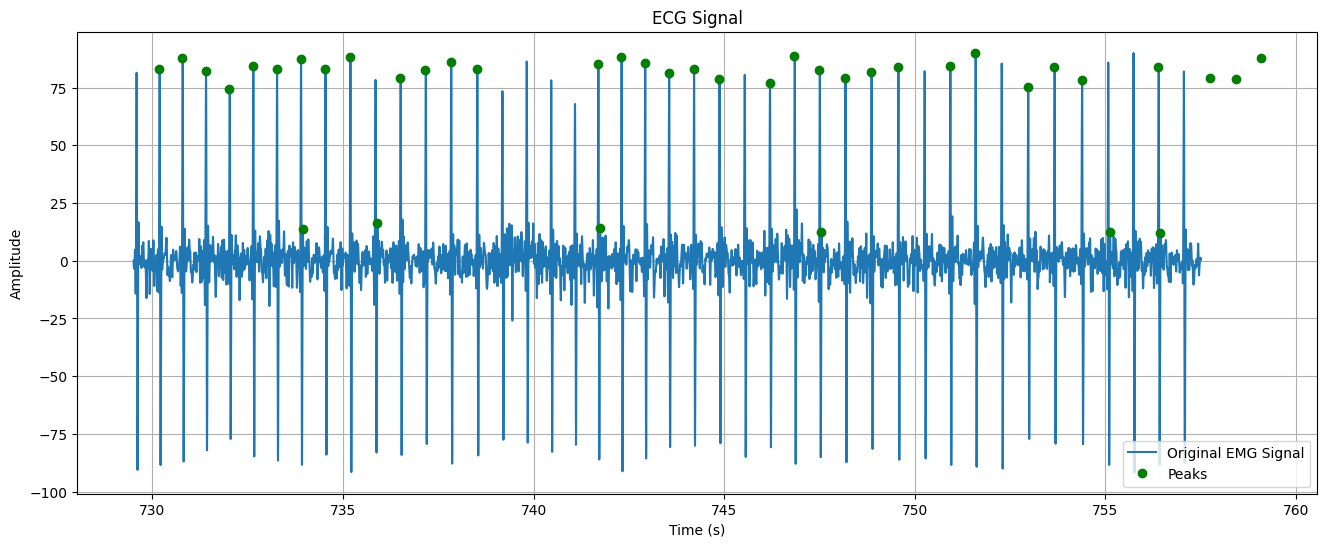

In [21]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(signal, threshold = 0.18)

plt.figure(figsize=(16, 6))
plt.plot(x_smoothed[:28000], signal[:28000], label='Original EMG Signal')

plt.plot(x_smoothed[peaks][:40], signal[peaks][:40], 'go', label='Peaks')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('ECG Signal')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
peak=[]

for i in range(len(peaks)-1):
  m = x_smoothed[peaks[i+1]] - x_smoothed[peaks[i]]
  peak.append(m)

peak_diff = np.array(peak)

mean = np.mean(peak_diff)

bpm = 60/mean
print(bpm)

75.99069713204761
